## Explore GeoWiki processing code to exclude country 

### GeoWiki Processor

In [18]:
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray
import matplotlib.pyplot as plt

import sys
from pathlib import Path

sys.path.append("..")

from src.processors import (
    GeoWikiProcessor,
    TogoProcessor,
)
from src.engineer import (
    GeoWikiEngineer,
    TogoEngineer,
    TogoEvaluationEngineer,
)

In [2]:
processor = GeoWikiProcessor(Path('../data'))

In [3]:
location_data = processor.load_raw_data('all')

In [4]:
#location_data

In [5]:
mean_per_location = (
            location_data[["location_id", "sumcrop", "loc_cent_X", "loc_cent_Y"]]
            .groupby("location_id")
            .mean()
        )

In [6]:
#mean_per_location

In [7]:
 mean_per_location = mean_per_location.rename(
            {"loc_cent_X": "lon", "loc_cent_Y": "lat", "sumcrop": "mean_sumcrop"},
            axis="columns",
            errors="raise",
        )

In [8]:
#mean_per_location

In [9]:
output_xr = (
            mean_per_location.reset_index()
            .set_index(["lon", "lat"])["mean_sumcrop"]
            .to_xarray()
        )

In [10]:
#output_xr

### GeoWiki Engineer

In [11]:
xarr = xarray.open_dataset(processor.output_folder/'data.nc').to_dataframe().dropna().reset_index()

In [12]:
xarr['lon']

0       -68.75
1       -68.25
2       -68.75
3       -68.25
4       -69.75
         ...  
35861   -46.25
35862   -43.25
35863   -24.75
35864   -23.75
35865   -30.25
Name: lon, Length: 35866, dtype: float64

In [13]:
engineer = GeoWikiEngineer(Path('../data'))

In [14]:
engineer.labels # same as 'data.nc'

,lat,lon,mean_sumcrop
0,-54.547619,-68.75,0.0
1,-54.047619,-68.25,0.0
2,-53.547619,-68.75,0.0
3,-53.547619,-68.25,4.8
4,-53.047619,-69.75,0.0
...,...,...,...
35861,82.452381,-46.25,0.0
35862,82.452381,-43.25,0.0
35863,82.452381,-24.75,0.0
35864,82.452381,-23.75,0.0


#### Recreate process_single_file() function in engineer/geowiki.py

In [15]:
tif_example_path = engineer.geospatial_files[0]
tif_example_path

PosixPath('../data/raw/earth_engine_geowiki/1060_2017-03-28_2018-03-28.tif')

In [16]:
file_info = engineer.process_filename(tif_example_path.name, True)
file_info

('1060',
 datetime.datetime(2017, 3, 28, 0, 0),
 datetime.datetime(2018, 3, 28, 0, 0))

In [19]:
val_set_size = 0.2
test_set_size = 0.0
if engineer.eval_only:
    data_subset = "testing"
else:
    random_float = np.random.uniform()
    # we split into (val, test, train)
    if random_float <= (val_set_size + test_set_size):
        if random_float <= val_set_size:
            data_subset = "validation"
        else:
            data_subset = "testing"
    else:
        data_subset = "training"                

In [20]:
data_subset

'training'

In [21]:
da = engineer.load_tif(tif_example_path, days_per_timestep=30, start_date=file_info[1])
da

<xarray.DataArray 'FEATURES' (time: 12, band: 13, y: 17, x: 20)>
array([[[[0.5254, 0.5254, 0.5254, ..., 0.4357, 0.4357, 0.4357],
         [0.5254, 0.5254, 0.5254, ..., 0.4357, 0.4357, 0.4357],
         [0.5254, 0.5254, 0.5254, ..., 0.4357, 0.4357, 0.4357],
         ...,
         [0.5442, 0.5442, 0.5442, ..., 0.3065, 0.3065, 0.2662],
         [0.5442, 0.5442, 0.5442, ..., 0.3065, 0.3065, 0.2662],
         [0.5442, 0.5442, 0.5442, ..., 0.3065, 0.3065, 0.2662]],

        [[0.5138, 0.5151, 0.518 , ..., 0.448 , 0.4359, 0.4359],
         [0.5073, 0.509 , 0.5104, ..., 0.445 , 0.4339, 0.4339],
         [0.4946, 0.4966, 0.5023, ..., 0.434 , 0.4254, 0.4254],
         ...,
         [0.5551, 0.5375, 0.5375, ..., 0.2314, 0.2202, 0.2194],
         [0.5594, 0.5391, 0.5391, ..., 0.2145, 0.2083, 0.218 ],
         [0.5635, 0.5479, 0.5479, ..., 0.198 , 0.1953, 0.2066]],

        [[0.4815, 0.4843, 0.4872, ..., 0.4256, 0.413 , 0.413 ],
         [0.4698, 0.4726, 0.486 , ..., 0.4173, 0.402 , 0.402 ],
         [0.4644, 0.4579, 0.4666, ..., 0.3978, 0.3863, 0.3863],
         ...,
...
         ...,
         [0.0017, 0.0017, 0.0017, ..., 0.0016, 0.0016, 0.0019],
         [0.0017, 0.0017, 0.0017, ..., 0.0016, 0.0016, 0.0019],
         [0.0018, 0.0018, 0.0018, ..., 0.0018, 0.0018, 0.002 ]],

        [[0.4195, 0.4147, 0.4147, ..., 0.4353, 0.4353, 0.4533],
         [0.41  , 0.4014, 0.4014, ..., 0.4377, 0.4377, 0.4502],
         [0.41  , 0.4014, 0.4014, ..., 0.4377, 0.4377, 0.4502],
         ...,
         [0.4367, 0.4371, 0.4371, ..., 0.4249, 0.4249, 0.4472],
         [0.4365, 0.4368, 0.4368, ..., 0.43  , 0.43  , 0.4494],
         [0.4453, 0.4439, 0.4439, ..., 0.44  , 0.44  , 0.4573]],

        [[0.3457, 0.3384, 0.3384, ..., 0.3734, 0.3734, 0.3708],
         [0.3268, 0.3224, 0.3224, ..., 0.3761, 0.3761, 0.3724],
         [0.3268, 0.3224, 0.3224, ..., 0.3761, 0.3761, 0.3724],
         ...,
         [0.3721, 0.3723, 0.3723, ..., 0.354 , 0.354 , 0.3575],
         [0.377 , 0.377 , 0.377 , ..., 0.3622, 0.3622, 0.3619],
         [0.3762, 0.3762, 0.3762, ..., 0.3633, 0.3633, 0.3639]]]])
Coordinates:
  * band     (band) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * y        (y) float64 -32.75 -32.75 -32.75 -32.75 ... -32.75 -32.75 -32.75
  * x        (x) float64 138.7 138.7 138.7 138.7 ... 138.7 138.7 138.7 138.7
  * time     (time) datetime64[ns] 2017-03-28 2017-04-27 ... 2018-02-21
Attributes:
    band_descriptions:  ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A...

In [22]:
min_lon, min_lat = float(da.x.min()), float(da.y.min())
max_lon, max_lat = float(da.x.max()), float(da.y.max())
# Get the "labelled pixel" that this tif contains (kind of filtering engineer.lables by a bounding box given by tif bounds)
overlap = engineer.labels[
            (
                (engineer.labels.lon <= max_lon)
                & (engineer.labels.lon >= min_lon)
                & (engineer.labels.lat <= max_lat)
                & (engineer.labels.lat >= min_lat)
            )
        ]

In [23]:
overlap

,lat,lon,mean_sumcrop
1060,-32.75,138.651786,25.0


In [24]:
label_lat = overlap.iloc[0].lat
label_lon = overlap.iloc[0].lon

# we turn the percentage into a fraction
crop_probability = overlap.iloc[0].mean_sumcrop / 100

# find the x,y of the pixel that matches the label better
closest_lon = engineer.find_nearest(da.x, label_lon)
closest_lat = engineer.find_nearest(da.y, label_lat)

In [25]:
label_lat, closest_lat

(-32.75, -32.75001506043801)

In [26]:
label_lon, closest_lon

(138.65178569999998, 138.6517750845895)

In [27]:
crop_probability

0.25

In [28]:
labelled_np = da.sel(x=closest_lon).sel(y=closest_lat).values

In [29]:
da.sel(x=closest_lon).sel(y=closest_lat).values.shape

(12, 13)

In [30]:
instance = engineer.process_single_file(
                path_to_file=tif_example_path,
                nan_fill=0.0,
                max_nan_ratio=0.3,
                add_ndvi=True,
                calculate_normalizing_dict=False,
                start_date=file_info[1],
                days_per_timestep=30,
                is_test=True if data_subset == "testing" else False,
)

In [31]:
instance

GeoWikiDataInstance(label_lat=-32.75, label_lon=138.65178569999998, instance_lat=-32.75001506043801, instance_lon=138.6517750845895, labelled_array=array([[0.4853    , 0.5092    , 0.475     , 0.5008    , 0.5131    ,
        0.5211    , 0.54      , 0.5623    , 0.5529    , 0.3012    ,
        0.0069    , 0.486     , 0.3653    , 0.05784968],
       [0.182     , 0.1192    , 0.1168    , 0.1163    , 0.1481    ,
        0.2243    , 0.2554    , 0.2126    , 0.2834    , 0.1071    ,
        0.003     , 0.2346    , 0.1951    , 0.29279416],
       [0.1376    , 0.109     , 0.1053    , 0.1141    , 0.1593    ,
        0.2346    , 0.2739    , 0.2571    , 0.2987    , 0.115     ,
        0.0016    , 0.3003    , 0.2016    , 0.38523707],
       [0.2232    , 0.2412    , 0.2081    , 0.2176    , 0.2376    ,
        0.2899    , 0.316     , 0.3421    , 0.343     , 0.1162    ,
        0.0017    , 0.3061    , 0.2109    , 0.22244059],
       [0.128     , 0.1106    , 0.1091    , 0.1338    , 0.1646    ,
        0.22

In [32]:
togoeval_engineer = TogoEvaluationEngineer(Path('../data'))

In [33]:
togoeval_engineer.eval_only

True

## Filter engineer.labels by Nigeria

Probably can't trust the identifier of the tif files to be the same as the index in the data.nc file, so will need to load all tifs of geowiki in order to get the lat/lon and get the subset inside a country and leave them out the training set. Make a function modifying base.py --> engineer() to get the lat/lon of each instance (output of process_single_file fuction) together with the identifier. Then transfrom this into a geodataframe to make a column of which country the fall on, which I can then use to create my custom train/val/test splits out of geowiki.
<br/>
<br/>
**Steps**:
1. Loop over the geospatial files and append the lat/lon of each instance as well as the identifier to a tuple.
2. Convert into geospatial dataframe
3. Get shapefile of India and Nigeria (perhaps from CropHarvest) to see which labels (identifiers) fall there (or merge with shp of a country to add a column for each country of labels)
4. Separate .pkl files of the country of interest
5. Make train/val/test split

**1. Match identifier with lat/lon of label**

In [34]:
path = engineer.savedir / 'identifiers.csv'
if path.exists():
    df = pd.read_csv(engineer.savedir / 'identifiers.csv')
else:
    tuples = []
    for file_path in engineer.geospatial_files:
        file_info = engineer.process_filename(file_path.name, True)
        if file_info is None:
            continue
        identifier, start_date, end_date = file_info
        file_name = f"{identifier}_{str(start_date.date())}_{str(end_date.date())}"

        instance = engineer.process_single_file(
                    file_path,
                    nan_fill=0.0,
                    max_nan_ratio=0.3,
                    add_ndvi=True,
                    calculate_normalizing_dict=False,
                    start_date=start_date,
                    days_per_timestep=30,
                    is_test=True if data_subset == "testing" else False,
                )
        tuples.append((identifier, instance.instance_lat, instance.instance_lon))
    df = pd.DataFrame(tuples, columns=['identifier', 'lat', 'lon'])
    df.to_csv(engineer.savedir / 'identifiers.csv', index=False)

In [35]:
df = df.sort_values(by=['identifier']).reset_index(drop=True)

In [36]:
df

,identifier,lat,lon
0,0,-54.547635,-68.750000
1,1,-54.047633,-68.249998
2,2,-53.547631,-68.750000
3,3,-53.547631,-68.249998
4,4,-53.047629,-69.750005
...,...,...,...
35594,35610,60.952354,73.750023
35595,35611,60.952354,163.749985
35596,35612,60.952354,50.250005
35597,35614,61.249966,22.952360


**2. Convert into geospatial dataframe**

In [37]:
geowiki_points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['lon'], df['lat']))

In [38]:
geowiki_points

,identifier,lat,lon,geometry
0,0,-54.547635,-68.750000,POINT (-68.75000 -54.54764)
1,1,-54.047633,-68.249998,POINT (-68.25000 -54.04763)
2,2,-53.547631,-68.750000,POINT (-68.75000 -53.54763)
3,3,-53.547631,-68.249998,POINT (-68.25000 -53.54763)
4,4,-53.047629,-69.750005,POINT (-69.75000 -53.04763)
...,...,...,...,...
35594,35610,60.952354,73.750023,POINT (73.75002 60.95235)
35595,35611,60.952354,163.749985,POINT (163.74999 60.95235)
35596,35612,60.952354,50.250005,POINT (50.25001 60.95235)
35597,35614,61.249966,22.952360,POINT (22.95236 61.24997)


<AxesSubplot:>

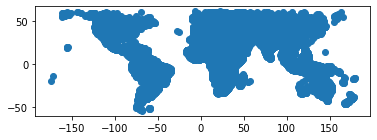

In [40]:
geowiki_points.plot()

**3. Get shape file of India and Nigeria and get identifiers of geowiki that fall there**

In [41]:
world_map = gpd.read_file('/home/gajo/miniconda3/envs/mlcropland-himachal/lib/python3.9/site-packages/cropharvest/country_shapefile/ne_50m_admin_0_countries.shp')

<AxesSubplot:>

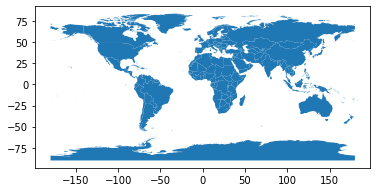

In [42]:
world_map.plot()

<AxesSubplot:>

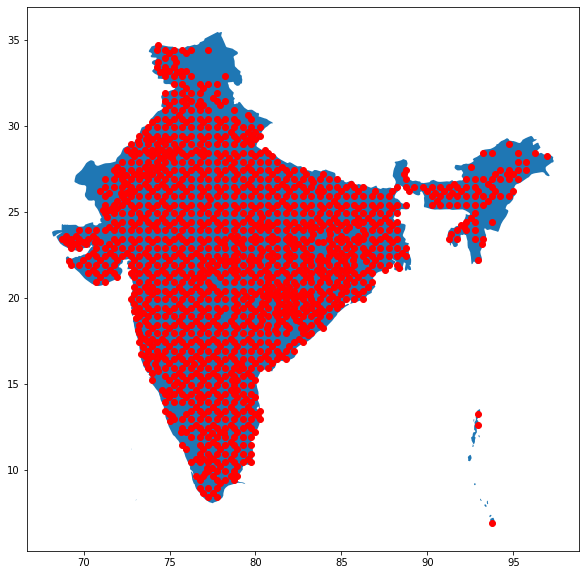

In [71]:
country = 'India' # 'India'
country_shp = world_map[world_map['SOVEREIGNT'] == country].reset_index(drop=True)

country_points_mask = geowiki_points.within(country_shp.loc[0, 'geometry'])
country_points = geowiki_points.loc[country_points_mask]

#Plot
fig, ax = plt.subplots(1,1, figsize=(10,10))
country_shp.plot(ax=ax)
country_points.plot(ax=ax,color='red')

In [72]:
ids = country_points['identifier'].values.tolist()
len(ids)

1589

In [73]:
country_points
country_points.crs = 'epsg:4326'

In [74]:
out_path = Path('/mnt/N/dataorg-datasets/MLsatellite/cropland-GEE-data/Global/Geowiki/sample_points')
country_points.to_file(out_path / f'{country}_points.shp')

**4. Separate .pkl files from country of interest**

In [150]:
pkl_files = list((engineer.savedir / 'fully_exclude_india' / 'all').glob('*.pkl'))

In [164]:
files = []
for file_path in pkl_files:
    file_info = engineer.process_filename(file_path.name, True)
    identifier, start_date, end_date = file_info
    if int(identifier) in ids:
        files.append(file_path)

In [166]:
len(files), files

(490,
 [PosixPath('../data/features/geowiki_landcover_2017/fully_exclude_india/all/11281_2017-03-28_2018-03-28.pkl'),
  PosixPath('../data/features/geowiki_landcover_2017/fully_exclude_india/all/11237_2017-03-28_2018-03-28.pkl'),
  PosixPath('../data/features/geowiki_landcover_2017/fully_exclude_india/all/11552_2017-03-28_2018-03-28.pkl'),
  PosixPath('../data/features/geowiki_landcover_2017/fully_exclude_india/all/13142_2017-03-28_2018-03-28.pkl'),
  PosixPath('../data/features/geowiki_landcover_2017/fully_exclude_india/all/13189_2017-03-28_2018-03-28.pkl'),
  PosixPath('../data/features/geowiki_landcover_2017/fully_exclude_india/all/12898_2017-03-28_2018-03-28.pkl'),
  PosixPath('../data/features/geowiki_landcover_2017/fully_exclude_india/all/12973_2017-03-28_2018-03-28.pkl'),
  PosixPath('../data/features/geowiki_landcover_2017/fully_exclude_india/all/12317_2017-03-28_2018-03-28.pkl'),
  PosixPath('../data/features/geowiki_landcover_2017/fully_exclude_india/all/10814_2017-03-28_2018

In [167]:
# TODO: move them to other folder